In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

from word2number import w2n


In [2]:
hr = pd.read_csv('HR_comma_sep.csv')

In [3]:
#hr.columns

In [4]:
hr.shape

(14999, 10)

In [5]:
#hr.head()

In [6]:
#hr.describe()

In [7]:
#hr.dtypes

In [8]:
#hr.isnull().sum()

In [9]:
#hr.Department.value_counts()

In [10]:
#hr.left.value_counts()

In [11]:
#hr.columns

In [12]:
#hr.salary.value_counts()

In [13]:
#plt.hist(hr.salary,bins=40,log=False)

In [14]:
#hr.info()

In [15]:
hr.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [16]:
#plt.bar(hr.salary,hr.number_project)

In [17]:
dum = pd.get_dummies(hr.salary)
dum

l = dum.low

In [18]:
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [19]:
new_hr = hr.drop(['Department','Work_accident','number_project'],axis='columns')
new_hr

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,left,promotion_last_5years,salary
0,0.38,0.53,157,3,1,0,low
1,0.80,0.86,262,6,1,0,medium
2,0.11,0.88,272,4,1,0,medium
3,0.72,0.87,223,5,1,0,low
4,0.37,0.52,159,3,1,0,low
...,...,...,...,...,...,...,...
14994,0.40,0.57,151,3,1,0,low
14995,0.37,0.48,160,3,1,0,low
14996,0.37,0.53,143,3,1,0,low
14997,0.11,0.96,280,4,1,0,low


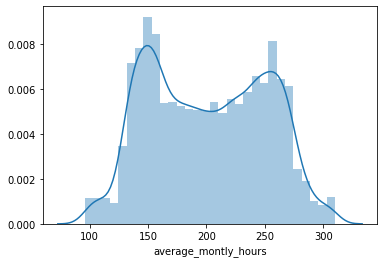

In [20]:
sns.distplot(hr.average_montly_hours,kde=True)

In [21]:
new_hr = hr.drop(['Department','Work_accident','number_project'],axis='columns')
new_hr

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,left,promotion_last_5years,salary
0,0.38,0.53,157,3,1,0,low
1,0.80,0.86,262,6,1,0,medium
2,0.11,0.88,272,4,1,0,medium
3,0.72,0.87,223,5,1,0,low
4,0.37,0.52,159,3,1,0,low
...,...,...,...,...,...,...,...
14994,0.40,0.57,151,3,1,0,low
14995,0.37,0.48,160,3,1,0,low
14996,0.37,0.53,143,3,1,0,low
14997,0.11,0.96,280,4,1,0,low


In [22]:
new_hr.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [25]:
def N_salary(x):
    if x == 'low':
        return 1
    if x == 'medium':
        return 2
    if x == 'high':
        return 3
    
new_hr['Salary'] = new_hr['salary'].apply(N_salary)
HR1 = new_hr.drop(['salary'],axis='columns')
HR1

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,left,promotion_last_5years,Salary
0,0.38,0.53,157,3,1,0,1
1,0.80,0.86,262,6,1,0,2
2,0.11,0.88,272,4,1,0,2
3,0.72,0.87,223,5,1,0,1
4,0.37,0.52,159,3,1,0,1
...,...,...,...,...,...,...,...
14994,0.40,0.57,151,3,1,0,1
14995,0.37,0.48,160,3,1,0,1
14996,0.37,0.53,143,3,1,0,1
14997,0.11,0.96,280,4,1,0,1


In [28]:
x = HR1.drop(['left'],axis='columns')
y = HR1.left


In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [32]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
model.score(X_test, y_test)

0.771